In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Layer , Flatten , Dense , MaxPooling2D
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Load Dataset

In [ ]:
x_train= np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')
x_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')


In [ ]:
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)
#print(len(x_train))

X_Train = x_train.reshape(len(x_train), 100, 100, 3)
Y_Train = y_train.reshape(len(y_train), 1)
X_Test = x_test.reshape(len(x_test), 100, 100, 3)
Y_Test = y_test.reshape(len(y_test), 1)

print("Shape of x_train : ", X_Train.shape)
print("Shape of y_train : ", Y_Train.shape)
print("Shape of x_test : ", X_Test.shape)
print("Shape of y_test : ", Y_Test.shape)

X_Train = X_Train/255.0
Y_Train = Y_Train/255.0
X_Test = X_Test/255.0
Y_Test = Y_Test/255.0

Shape of x_train :  (2000, 30000)
Shape of y_train :  (2000,)
Shape of x_test :  (400, 30000)
Shape of y_test :  (400,)
Shape of x_train :  (2000, 100, 100, 3)
Shape of y_train :  (2000, 1)
Shape of x_test :  (400, 100, 100, 3)
Shape of y_test :  (400, 1)


In [ ]:
X_Train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

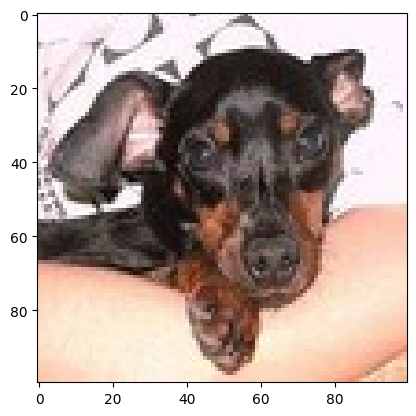

In [ ]:
id = np.random.randint(0, len(X_Train))
plt.imshow(X_Train[id])

# Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_Train, Y_Train, epochs=20, batch_size=32)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4848 - loss: 0.0133
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5315 - loss: 0.0120
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5005 - loss: 0.0128
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5049 - loss: 0.0127
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5108 - loss: 0.0125
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5036 - loss: 0.0127
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4974 - loss: 0.0129
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5043 - loss: 0.0127
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4887 - loss: 0.0131
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5136 - loss: 0.0125
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4879 - loss: 0.0131
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy:

In [ ]:
model.evaluate(X_Test, Y_Test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7916 - loss: 0.0077


[0.01729847863316536, 0.5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.00453925]]
The model says it is a :  dog


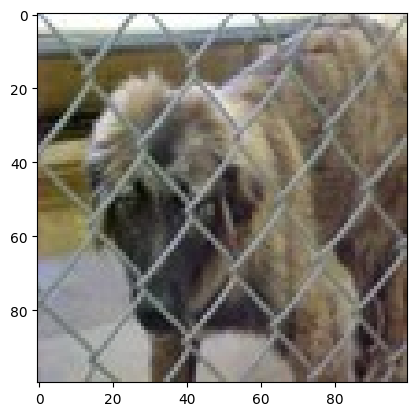

In [ ]:
id = np.random.randint(len(X_Test)/2+1, len(X_Test))
plt.imshow(X_Train[300])
y_pred = model.predict(X_Test[id, :].reshape(1,100,100,3))
print(y_pred)
if y_pred > 0.5:
  verdict = 'cat'
else:
  verdict = 'dog'


print("The model says it is a : ", verdict )